In [1]:
from sklearn.model_selection import train_test_split
import os
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm

In [2]:
# Function to preprocess an image
def preprocess_image(file_path, label, target_size=(128, 128)):
    img = load_img(file_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    label = int(label)  # Assuming labels are already encoded as integers
    return img_array, label

# Specify the path to your dataset folder
dataset_path = 'dataset'

# Get the list of class folders
classes = os.listdir(dataset_path)

# Create empty lists to store file paths and corresponding labels
file_paths = []
labels = []

# Loop through each class folder
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    
    # Get a list of file paths in the class folder
    class_files = [os.path.join(class_path, file) for file in os.listdir(class_path)]
    
    # Append file paths and labels to the lists
    file_paths.extend(class_files)
    labels.extend([class_name] * len(class_files))

# Convert class names to numerical labels
class_to_label = {class_name: i for i, class_name in enumerate(classes)}
labels = [class_to_label[label] for label in labels]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    file_paths, labels, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_train, y_train)]
X_test_processed = [preprocess_image(file_path, label) for file_path, label in zip(X_test, y_test)]

# Separate features and labels
X_train_features, y_train_labels = zip(*X_train_processed)
X_test_features, y_test_labels = zip(*X_test_processed)

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train_labels)
y_test_encoded = to_categorical(y_test_labels)


In [8]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(classes), activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Ensure the number of classes in the output layer matches the dataset
num_classes = len(classes)
model.add(Dense(num_classes, activation='softmax'))

# Convert labels to one-hot encoding with the correct number of classes
y_train_encoded = to_categorical(y_train_labels, num_classes=num_classes)
y_test_encoded = to_categorical(y_test_labels, num_classes=num_classes)


# Convert the lists of processed images to NumPy arrays
X_train_features = np.array(X_train_features)
X_test_features = np.array(X_test_features)

# Ensure that the input shape matches the model's expected input shape
input_shape = model.input_shape[1:]  # excluding batch size
X_train_features = X_train_features.reshape((-1,) + input_shape)
X_test_features = X_test_features.reshape((-1,) + input_shape)

# Convert labels to NumPy arrays as well
y_train_encoded = np.array(y_train_encoded)
y_test_encoded = np.array(y_test_encoded)

# Now you can train your model

model.fit(X_train_features, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_encoded)

Epoch 1/10
172/172 [==============================] - 19s 109ms/step - loss: 2.2752 - accuracy: 0.2297
Epoch 2/10
172/172 [==============================] - 19s 108ms/step - loss: 2.1538 - accuracy: 0.3359
Epoch 3/10
172/172 [==============================] - 18s 107ms/step - loss: 2.0785 - accuracy: 0.3571
Epoch 4/10
172/172 [==============================] - 20s 116ms/step - loss: 2.0299 - accuracy: 0.3720
Epoch 5/10
172/172 [==============================] - 19s 112ms/step - loss: 2.0624 - accuracy: 0.3396
Epoch 6/10
172/172 [==============================] - 19s 111ms/step - loss: 2.0400 - accuracy: 0.3321
Epoch 7/10
172/172 [==============================] - 20s 115ms/step - loss: 2.4307 - accuracy: 0.1040
Epoch 8/10
172/172 [==============================] - 19s 109ms/step - loss: 2.3511 - accuracy: 0.1396
Epoch 9/10
172/172 [==============================] - 22s 125ms/step - loss: 2.3332 - accuracy: 0.1711
Epoch 10/10
43/43 [==============================] - 1s 29ms/step - loss:

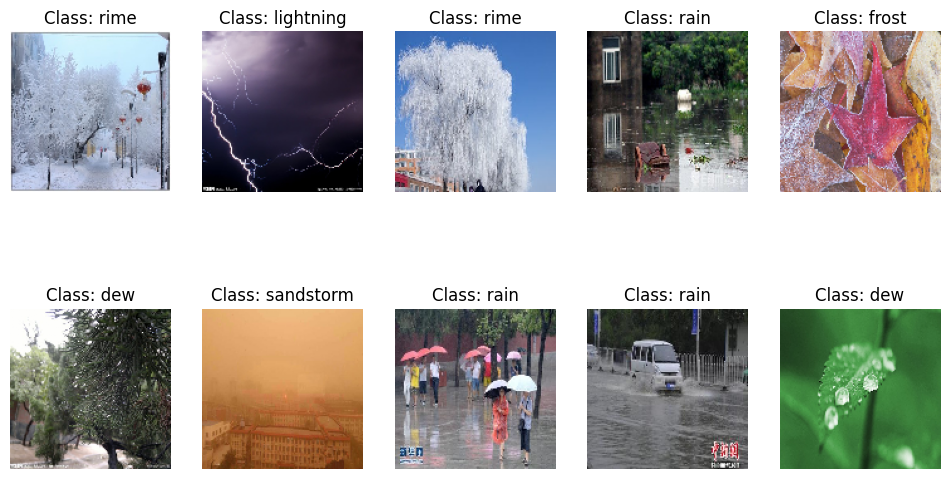

In [9]:
# Function to plot images
def plot_images(images, labels, class_names, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
    fig.subplots_adjust(hspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        # Display the image
        ax.imshow(images[i])
        
        # Display the class label
        class_label = class_names[labels[i]]
        ax.set_title(f'Class: {class_label}')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        # Hide axes
        ax.axis('off')

# Load and preprocess the first 10 images
first_10_paths = X_train[:10]
first_10_labels = y_train[:10]

first_10_images = [preprocess_image(file_path, label)[0] for file_path, label in zip(first_10_paths, first_10_labels)]

# Define class names based on your dataset
class_names = sorted(os.listdir(dataset_path))

# Plot the first 10 images
plot_images(first_10_images, first_10_labels, class_names)

# Show the plot
plt.show()
